In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../')
import utils
import calibration_utils as calibration
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [25]:
CALIBRATION_FILE = '../calibration/out/cal_2_C_matrix.mat'
MEASUREMENT_ROOT = './measurement_files/'
MEASUREMENT = "validation_1"
NANO_FILE = MEASUREMENT_ROOT + MEASUREMENT + ".csv"
TELEMETRY_FILE = MEASUREMENT_ROOT + MEASUREMENT + "_telemetry.txt"

In [26]:
nano_df = calibration.nanofile_to_dataframe(NANO_FILE)
telem_df = calibration.telemetry_to_dataframe(TELEMETRY_FILE)
C = scipy.io.loadmat(CALIBRATION_FILE)['C']
print nano_df.shape
print telem_df.shape
print C.shape

(309000, 7)
(20395, 9)
(24, 6)


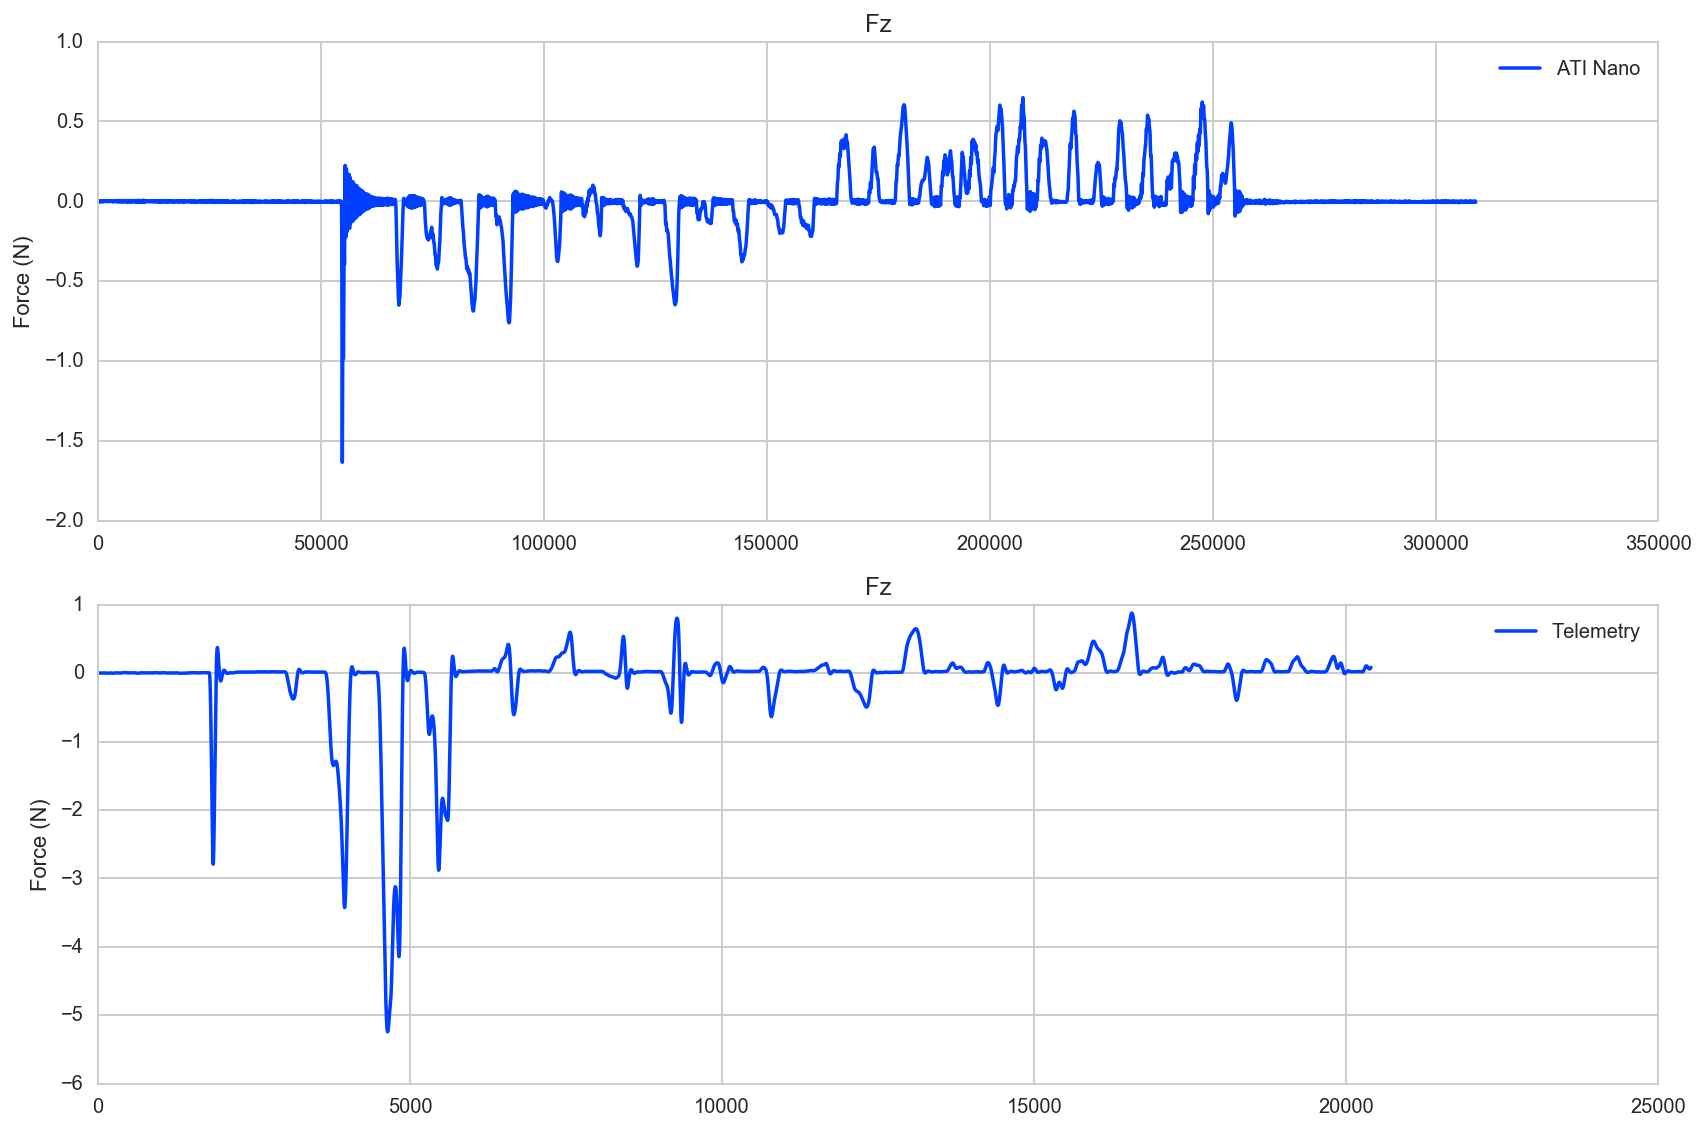

In [27]:
fig, ax = plt.subplots(2)
ax[0].plot(nano_df["Fz"], label="ATI Nano")
ax[0].set_title("Fz")
ax[0].set_ylabel("Force (N)")
ax[0].legend(loc='upper right')

ax[1].plot(utils.add_forces_moments(telem_df, C)["Fz"], label="Telemetry")
ax[1].set_ylabel("Force (N)")
ax[1].set_title("Fz")
ax[1].legend(loc='upper right')

fig.set_size_inches(12, 8)
plt.tight_layout()

plt.show()

In [28]:
FLICK_NANO_INDEX = nano_df["Fz"][:100000].apply(abs).argmax(axis=0)
FLICK_TELEM_INDEX = utils.add_forces_moments(telem_df, C)['Fz'][:5000].apply(abs).argmax(axis=0) # the flick index
print FLICK_NANO_INDEX
print FLICK_TELEM_INDEX

54814
4642


In [29]:
M, S = calibration.align_two_streams(nano_df, telem_df, 10, 1, FLICK_NANO_INDEX, FLICK_TELEM_INDEX)
print M.shape
print S.shape

(15753, 6)
(15753, 8)


In [30]:
# C = calibration.least_squares_fit(M,S)

In [31]:
S_df = pd.DataFrame(S, columns=["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8"])
shell_sensor_df = utils.add_forces_moments(S_df, C)
nano_sensor_df = pd.DataFrame(M, columns=["Fx", "Fy", "Fz", "Mx", "My", "Mz"])

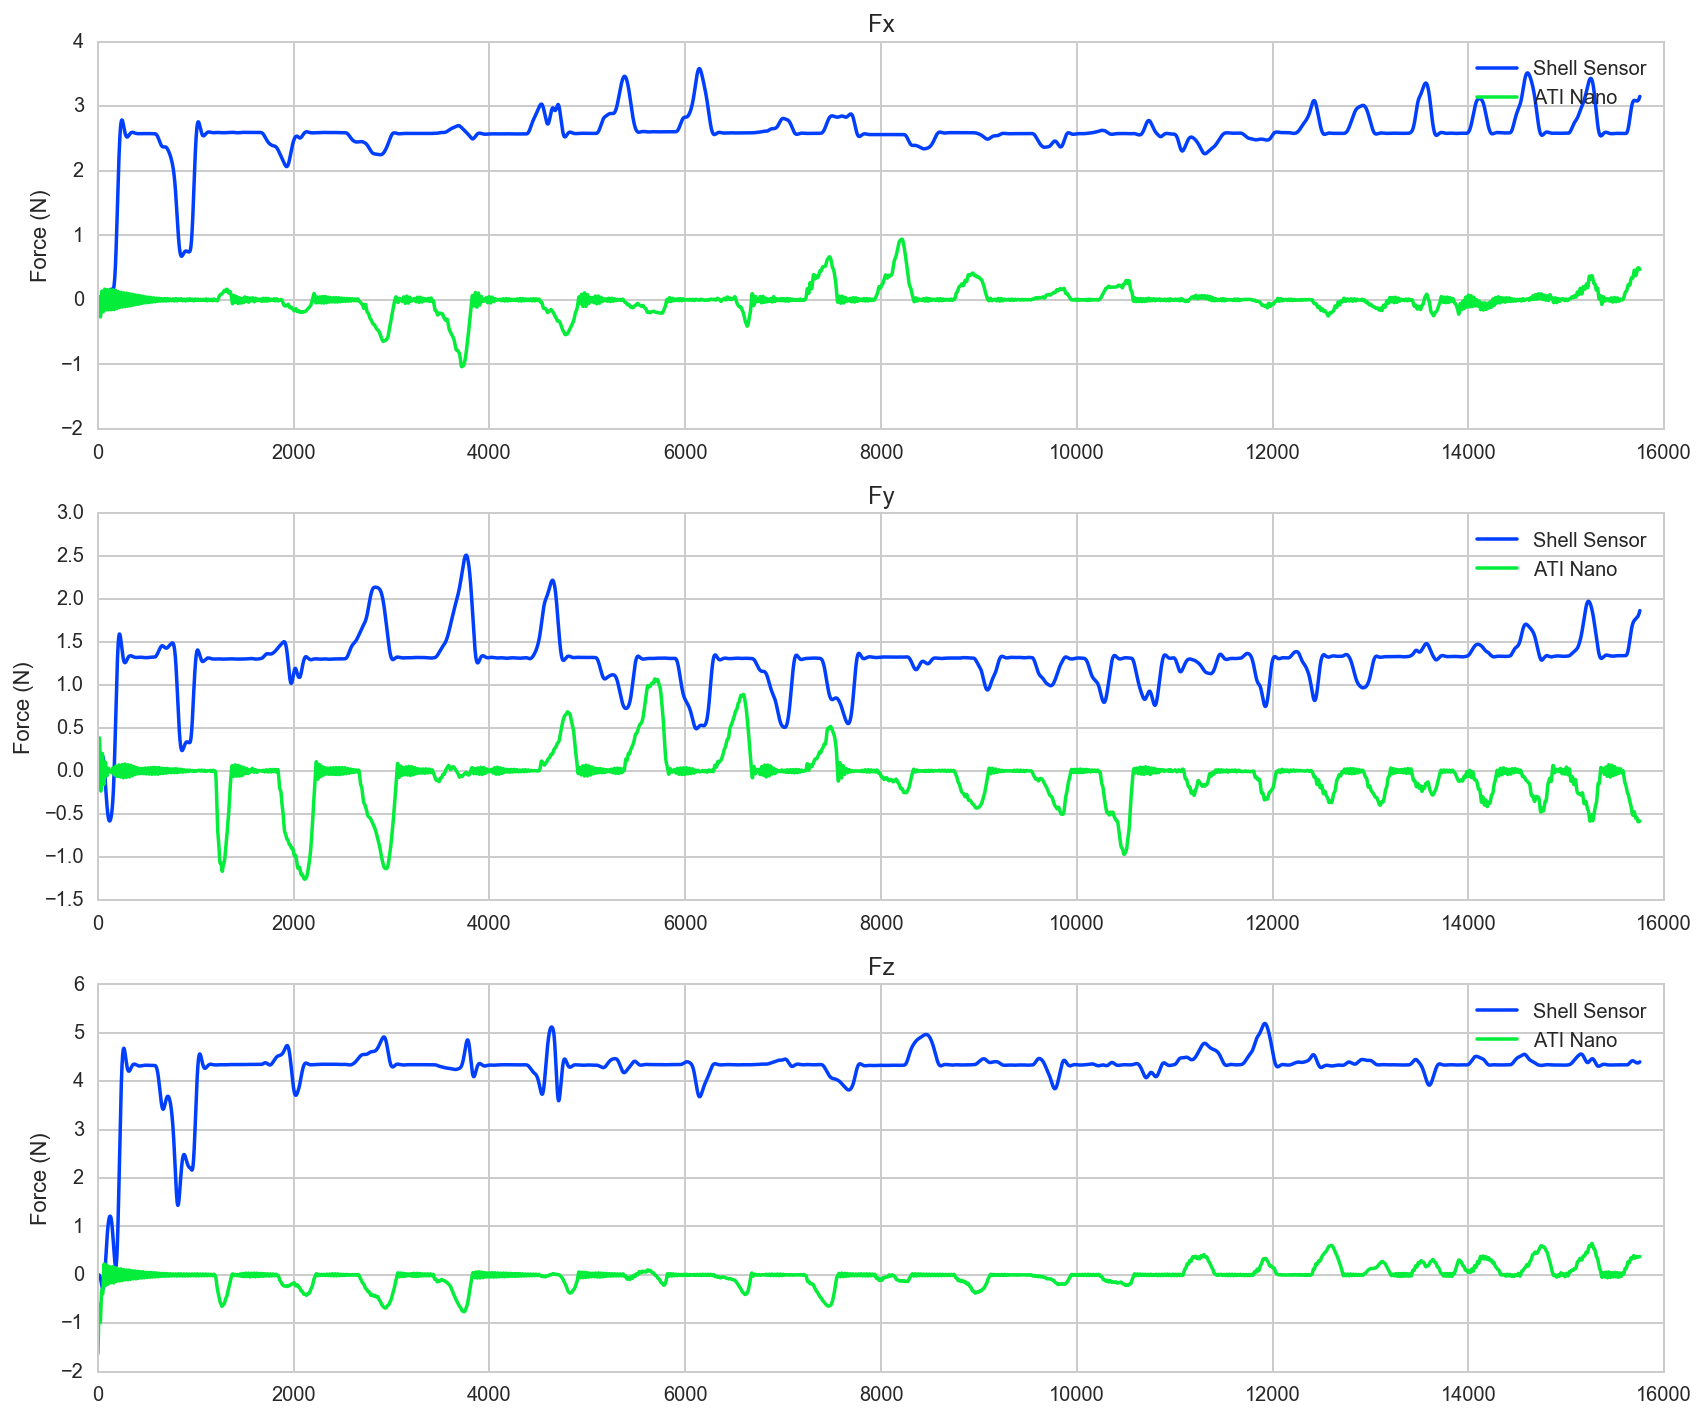

In [32]:
calibration.plot_force_error(shell_sensor_df, nano_sensor_df)

In [33]:
loss = calibration.calculate_mse_error(shell_sensor_df, nano_sensor_df, columns=['Fx', 'Fy', 'Fz'])
print loss

Fx     6.848569
Fy     1.984489
Fz    18.655482
dtype: float64
